# Predict House Prices Model

## Bussiness Problem

<p style="text-align: justify;">
A real estate company in California was facing a major challenge in determining accurate prices for the properties they were selling or buying. Improper pricing can have significant negative impacts, both in the form of financial losses and lost business opportunities. Pricing too high can make properties difficult to sell, resulting in inventory build-up and increased operating costs. Conversely, a price that is too low can lead to losses as the property is sold below its true market value, hurting the company in the long run.
</p>

## Problem Statement

<p style="text-align: justify;">
Real estate companies in California face challenges in accurately determining the sale and purchase price of properties, which can have a significant impact on financial returns and business opportunities. Improper pricing can result in properties selling below market value or staying on the market too long, resulting in additional costs and potential losses. Therefore, companies need a solution that can optimize the pricing process by leveraging historical data and predictive analytics.

How can we utilize historical property data in California to develop a predictive model that can accurately forecast the average price of a home? This model should consider various factors that affect property values.
</p>

## Analytic approach

To address the housing price prediction project in California, the analytical approach involves an in-depth analysis of the housing market data in the region. The steps are as follows:

**Understanding the Dataset**: This stage involves studying the available dataset, including the existing variables and how they may affect housing prices.

**Data Exploration**: Exploratory data analysis is performed to identify patterns or trends that may exist within the dataset. Data visualization is often used to better understand the relationships between variables and housing prices.

**Data Cleaning**: This process involves identifying and rectifying missing values, outliers, or invalid data.

**Feature Engineering**: New features can be created from the existing data to enhance model performance.

**Model Selection**: Based on the characteristics of the housing price prediction task, several commonly used machine learning models include linear regression, KNN, ridge, decision tree, random forest, and XGBoost.

**Model Training and Evaluation**: Machine learning models are trained using the training data and evaluated using appropriate metrics.

**Results Interpretation**: The results from the machine learning models are evaluated to understand the key factors influencing housing prices in California.


# Goal 

<p style="text-align: justify;">
<ul>
    <li>Develop a regression model that can predict median home prices in California with a high degree of accuracy.</li>
    <li>Identify the factors that have the most influence on house prices in California.</li>
    <li>Provide a predictive tool that can be used by real estate professionals to assist in property pricing.</li>
    <li>Improve efficiency and accuracy in the property valuation process.</li>
    <li>Provide insights that can be used for strategic decision-making in property investment and real estate development.</li>

</ul>
</p>


# Data

<body>
    <h1>California Housing Dataset Information</h1>
    <table>
        <tr>
            <th>Column</th>
            <th>Description</th>
        </tr>
        <tr>
            <td>longitude</td>
            <td>A measure of how far west a house is; higher values mean more west.</td>
        </tr>
        <tr>
            <td>latitude</td>
            <td>A measure of how far north a house is; higher values mean more north.</td>
        </tr>
        <tr>
            <td>housing Median Age</td>
            <td>The median age of houses in a block; lower numbers indicate newer buildings.</td>
        </tr>
        <tr>
            <td>total Rooms</td>
            <td>The total number of rooms in a block.</td>
        </tr>
        <tr>
            <td>total Bedrooms</td>
            <td>Total number of bedrooms in a block.</td>
        </tr>
        <tr>
            <td>population</td>
            <td>Total number of people living in a block.</td>
        </tr>
        <tr>
            <td>households</td>
            <td>Total number of households, the group of people living in a housing unit, in a block.</td>
        </tr>
        <tr>
            <td>median Income</td>
            <td>Median income for households in a housing block (measured in tens of thousands of US Dollars).</td>
        </tr>
        <tr>
            <td>median House Value</td>
            <td>Median house value for households in a block (measured in US Dollars).</td>
        </tr>
        <tr>
            <td>ocean Proximity</td>
            <td>The location of the house in relation to the ocean/sea.</td>
        </tr>
        <tr>
            <td>rooms per household</td>
            <td>additional information on the availability of space in housing..</td>
        </tr>
        <tr>
            <td>population per household</td>
            <td>The ratio of total population to total households can give an indication of the population density in an area.</td>
        </tr>
    </table>
</body>

# Metrics

> # EDA

In [2]:
# untuk manipulasi data
import pandas as pd
import numpy as np

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk menghitung Variance Inflation Factor (VIF) dalam regresi linear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk normalisasi dan transformasi data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler

# untuk pembagian dataset dan validasi model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold,KFold, RandomizedSearchCV

# untuk membangun pipeline pemrosesan data dan model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# untuk model Decision Tree dan visualisasi pohon keputusan
from sklearn.tree import DecisionTreeRegressor, plot_tree

# use memory
from memory_profiler import memory_usage

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# untuk mengabaikan peringatan yang tidak diinginkan
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_california = pd.read_csv('dataset/data_california_house.csv')
df_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


> ## EDA

In [4]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

> Summary Statistic Descriptive

In [6]:
display(df_california.describe().T,
        df_california.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


,count,unique,top,freq
ocean_proximity,14448,5,<1H OCEAN,6369


> Data Understanding (Conclusion)

Berdasarkan penelurusan yang telah dilakukan dapat diketahui bahwa :
1. Dataet mempunyai 10 kolom dan 14448 baris
2. Dataset hanya mempunyai kategorikal yaitu  'ocean_proximity' dimana kolom ini memuat lokasi rumah dari ocean/sea
3. Dataset mempunya missing value 137  baris dan missing value berada pada kolom 'total_bedrooms'

> # Exploratory Data Analysis(EDA)

> EDA 1 Histogram Numeric Column

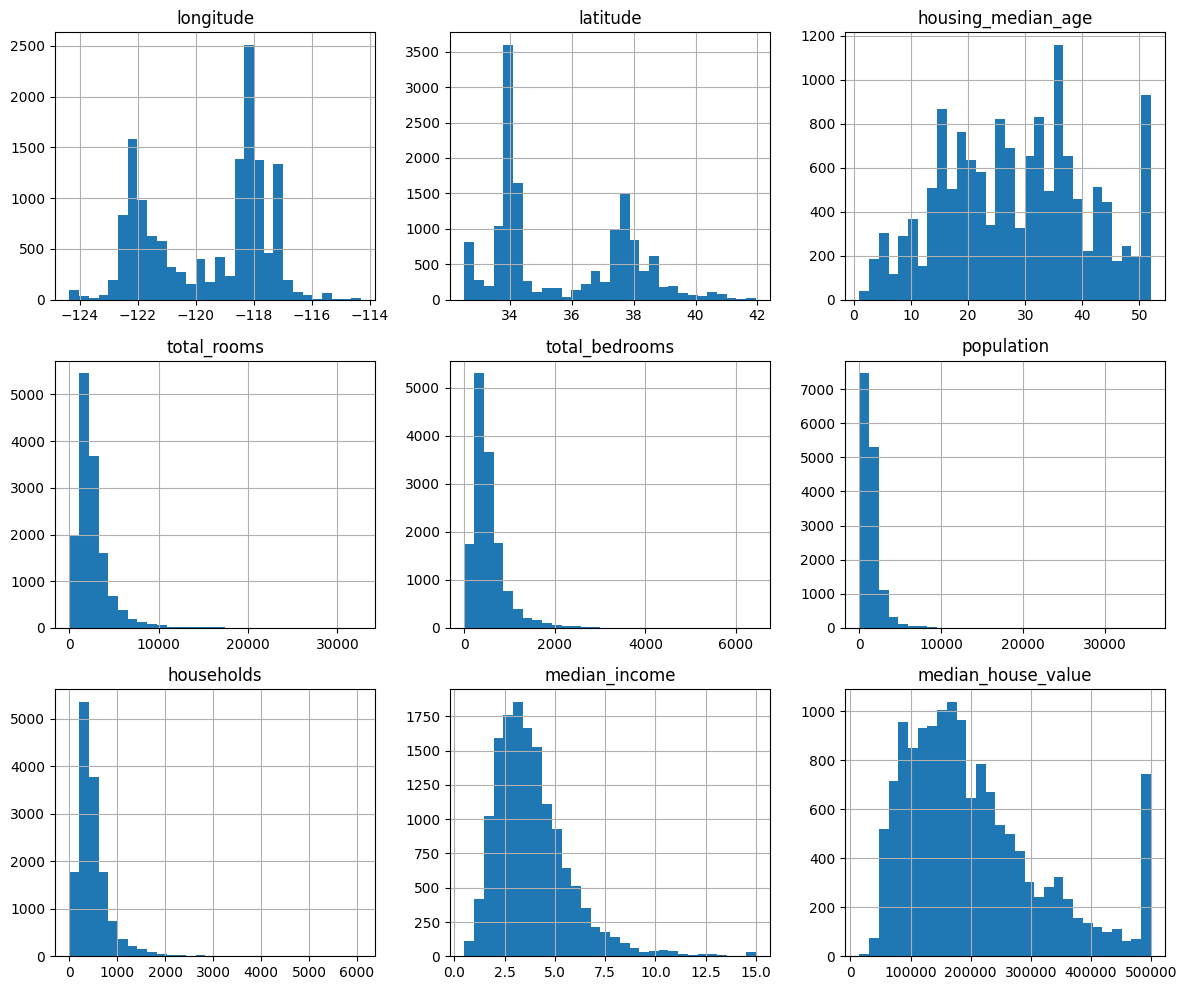

In [7]:
# Histogram from variable Numerik
df_california.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

> Corelation Metric

In [8]:
corelation = df_california.drop('ocean_proximity', axis=1).corr(method='spearman')
corelation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.879491,-0.159119,0.053617,0.075678,0.135127,0.070564,-0.006842,-0.069389
latitude,-0.879491,1.000000,0.041108,-0.033410,-0.069869,-0.136729,-0.087238,-0.091646,-0.167250
housing_median_age,-0.159119,0.041108,1.000000,-0.363420,-0.314208,-0.288264,-0.289847,-0.148067,0.072069
total_rooms,0.053617,-0.033410,-0.363420,1.000000,0.916249,0.815582,0.907105,0.271127,0.199245
total_bedrooms,0.075678,-0.069869,-0.314208,0.916249,1.000000,0.870014,0.975877,-0.002529,0.081704
population,0.135127,-0.136729,-0.288264,0.815582,0.870014,1.000000,0.902576,0.005163,-0.001653
households,0.070564,-0.087238,-0.289847,0.907105,0.975877,0.902576,1.000000,0.032316,0.108217
median_income,-0.006842,-0.091646,-0.148067,0.271127,-0.002529,0.005163,0.032316,1.000000,0.680296
median_house_value,-0.069389,-0.167250,0.072069,0.199245,0.081704,-0.001653,0.108217,0.680296,1.000000


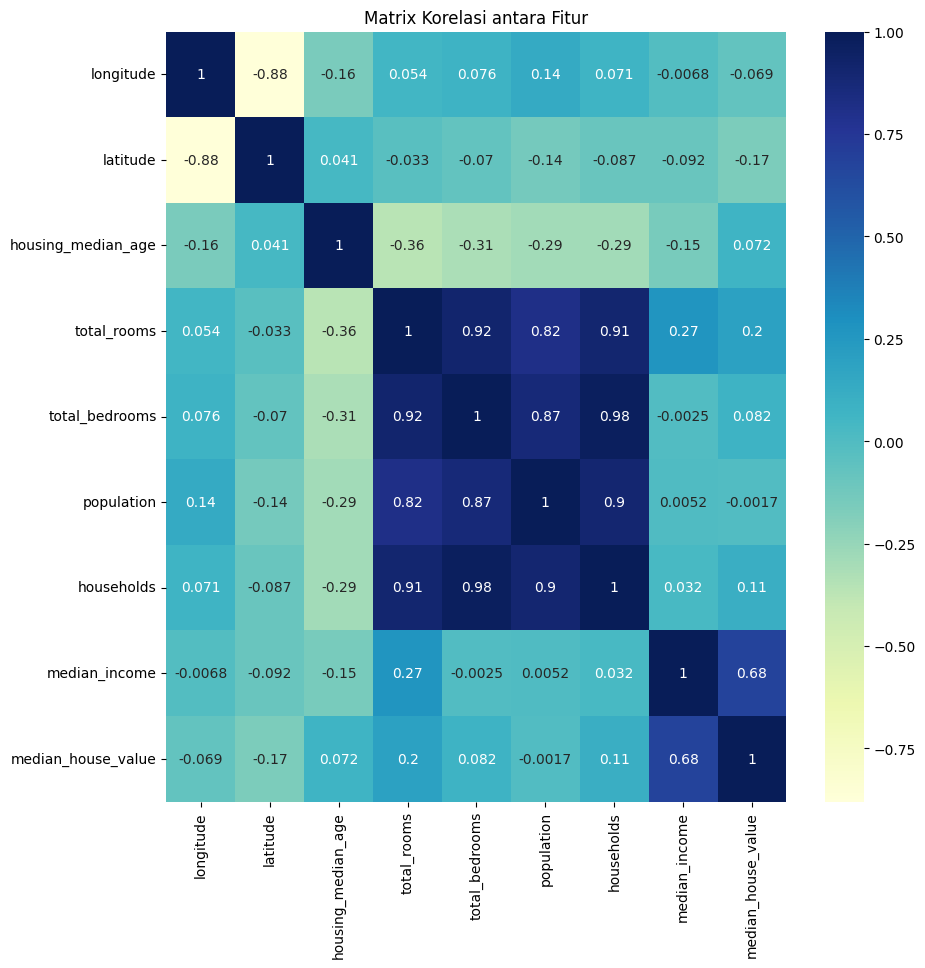

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,annot=True,cmap='YlGnBu').set_title('Matrix Korelasi antara Fitur')
plt.show()

<p style="text-align: justify;"> 
Pada "Korelasi heatmap" dapat dilihat bahwa korelasi dengan median_house_value yang tertinggi adalah pada median_income. </p>

>Map median house value 

In [10]:
import matplotlib.image as mpimg

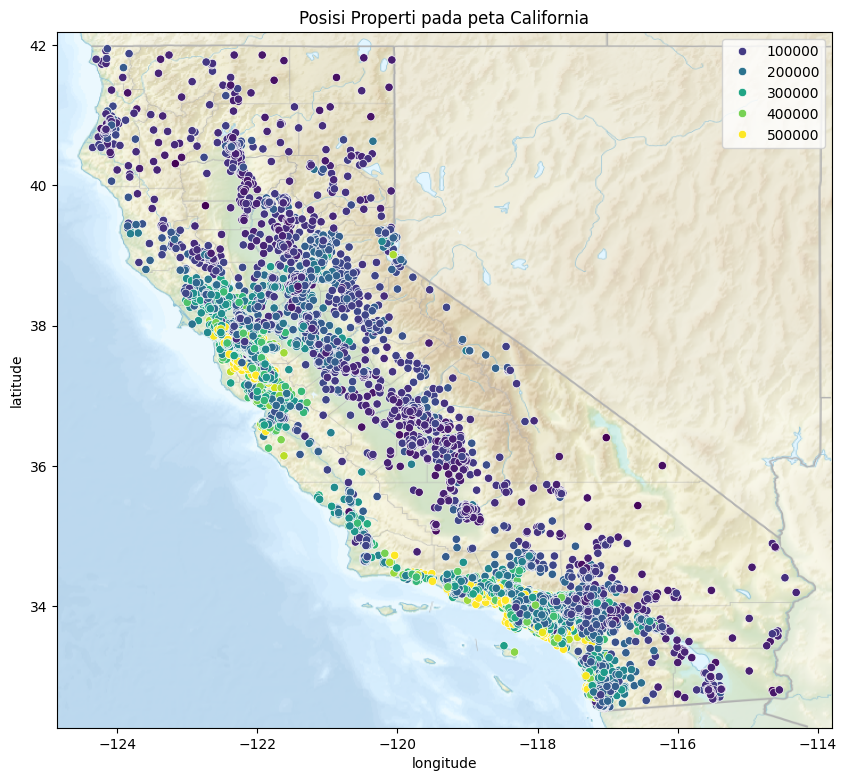

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_california, x="longitude", y="latitude", hue=df_california['median_house_value'],palette='viridis').set_title('Posisi Properti pada peta California')

# Asumsi bahwa 'dataset\california.png' adalah path yang benar ke gambar peta
california = mpimg.imread('dataset\california.png')
plt.imshow(california, extent=[-124.86, -113.8, 32.26, 42.19], alpha=0.5, cmap='jet')

# Menampilkan legenda
plt.legend()

plt.show()


<p style="text-align: justify;"> 
Peta sebaran porperti di california dengan harga nya</p>

> ## EDA Conclusion

Conclusion :
1. Pada Histogram kita dapatlihat distribusi setiap kolom numerik. Dapat kita lihat dua kolom 'housing_median_age' dan 'median_house_value' kedua kolom terdistribusi tidak normal danmemiliki data anomali. pada kolom 'median_house_value' ada lebih dari 600 properti dengan harga $500.001 serta kolom 'housing_median_age'  memiliki lebih dari 800 properti yang berusai 52 tahun.
2. Corelation Plot dengan graph ini dapat kita ketahui bagaimana korelasi fitur terhadap target 'median_house_value'. didapatkan bahwa kolom 'median_income' adalah fitur yang memiliki korelasi terkuat dengan 'median_house_value' dan arah korelasinya adalah positif, yang berarti semakin mahal harga propertinya semagin tinggi income pemiliknya. 
3. pada Map graph dapat dilihat penyebaran properti di seluruh daerah california. propertinya di wakili dengan dot, dimana dot memiliki warna yang mencerminkan harga properti semakin kuning warnanya semakin mahal harga propertitnya dan properti yang mahal berada di dekat garis pantai.

> ## Data PreProcessing

<p style="text-align: justify;"> 
Setelah data kita breakdown pada EDA, mari kita pre-process data-data nya agar sesuai dengan kebutuhan analisis serta pembuatan model. 
<br>
1. Duplicates
<br>
2. Missing Value
<br>
3. Outliers
 </p>


### Duplicate Data

In [12]:
df_california.duplicated().sum()

0

### Missing Value

In [13]:
df_california.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [14]:
df_california['total_bedrooms'].fillna(df_california['total_bedrooms'].median(), inplace=True)

Outlier Data

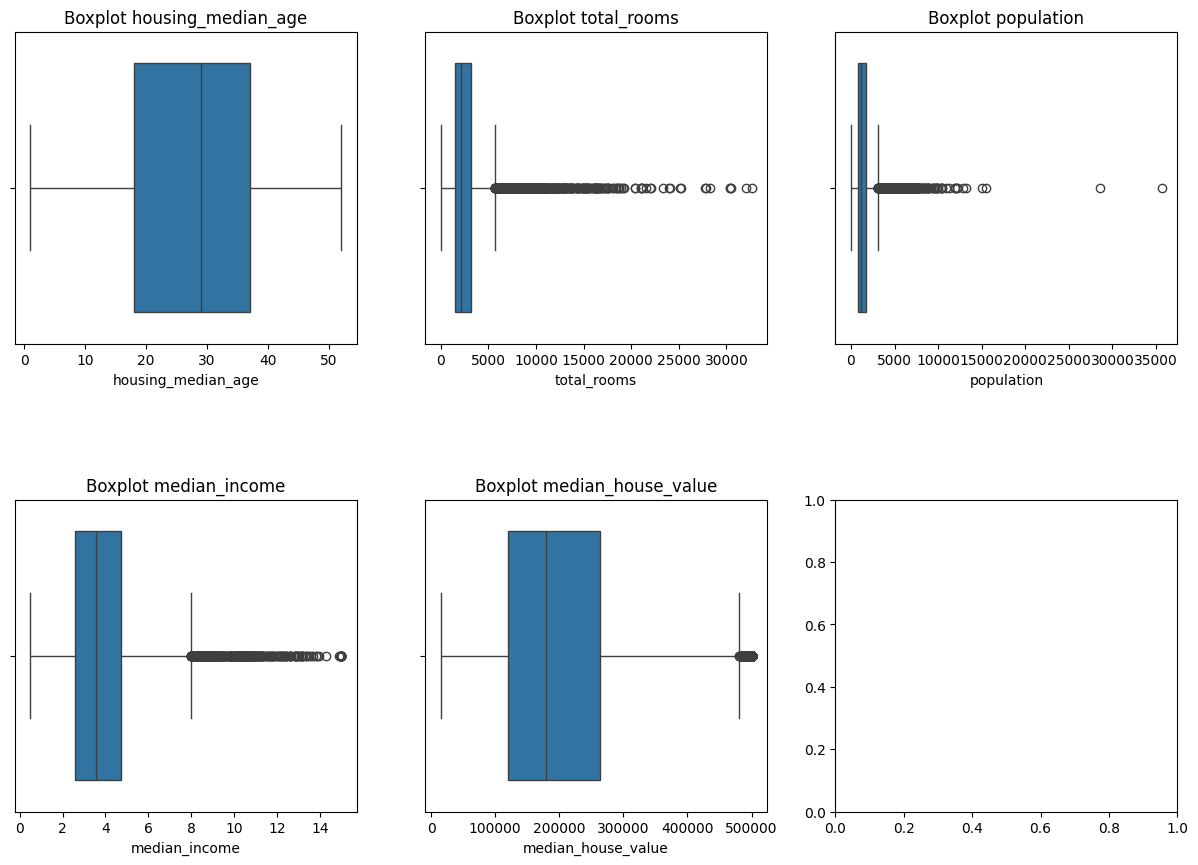

In [15]:
kolom = [ 'housing_median_age', 'total_rooms',
                    'population','median_income', 'median_house_value']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(bottom=0.1, hspace=0.5)

for i, col in enumerate(kolom):
    baris, kolom = divmod(i, 3)
    sns.boxplot(x=df_california[col], ax=axes[baris, kolom])
    axes[baris, kolom].set_title(f'Boxplot {col}')

In [16]:
df_california.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

Outlier yang ada merupakan bagian dari distribusi yang sebenarnya dan mencerminkan variabilitas alami dalam populasi, jika dihapus dapat menghilangkan informasi yang berharga.

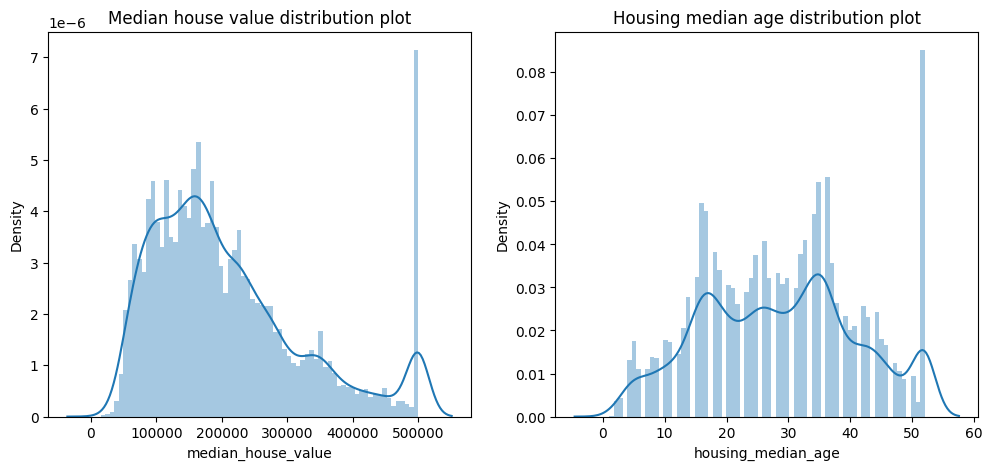

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

Remove Outlier

In [18]:
df_california = df_california.query('median_house_value != 500001.0 and housing_median_age != 52.0')

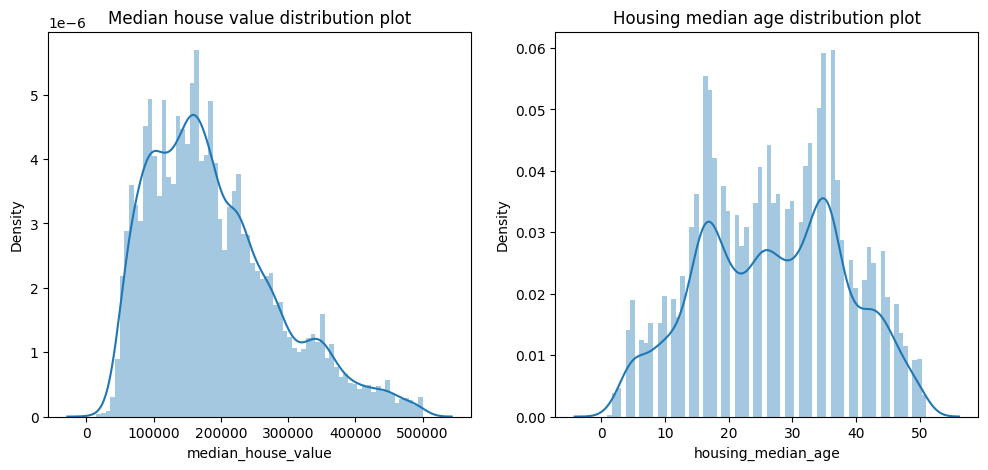

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_california['median_house_value'],kde=True,bins=70).set_title('Median house value distribution plot')
plt.subplot(1,2,2)
sns.distplot(df_california['housing_median_age'],kde=True,bins=70).set_title('Housing median age distribution plot')
plt.show()

> Conclusion

1. Duplicate Data : Tidak ada duplicate data pada dataset
2. Missing Value : Pada missing value yang ditemukan pada kolom 'total_bedrooms' diputuskan mengisi dengan median karena tidak terdistribusi secara normal dan terdapat outlier.
3. Outliers : Dalam dataset median_house_value, terdapat 678 data dengan nilai $500,001 yang dianggap tidak wajar. Hal ini kemungkinan merupakan kesalahan pencatatan atau pengumpulan data. Karena nilai tersebut tidak akurat, diputuskan untuk menghapusnya dari dataset. Selain itu, pada kolom housing_median_age, ada 896 properti dengan usia 52 tahun. Meskipun ini mungkin benar, ada kecurigaan bahwa rumah yang lebih tua dari 51 tahun dikelompokkan ke dalam kategori ini. Untuk menghindari bias dan memastikan konsistensi dalam model, data ini akan dihapus. Selain itu, diputuskan untuk mengubah data rumah berumur 51 tahun menjadi 50 tahun. Langkah ini bertujuan untuk menyederhanakan dan menstandarisasi dataset untuk keperluan machine learning, sehingga model yang dihasilkan lebih sederhana dan konsisten.

> # Feature Enginering

add new feature 

In [20]:
df_california['rooms_per_household'] = df_california['total_rooms'] / df_california['households']
df_california['population_per_household'] = df_california['population'] / df_california['households']


1. informasi tambahan mengenai ketersediaan ruang dalam perumahan. <br>
2. Rasio jumlah penduduk terhadap jumlah rumah tangga dapat memberikan indikasi kepadatan penduduk di suatu area. <br>


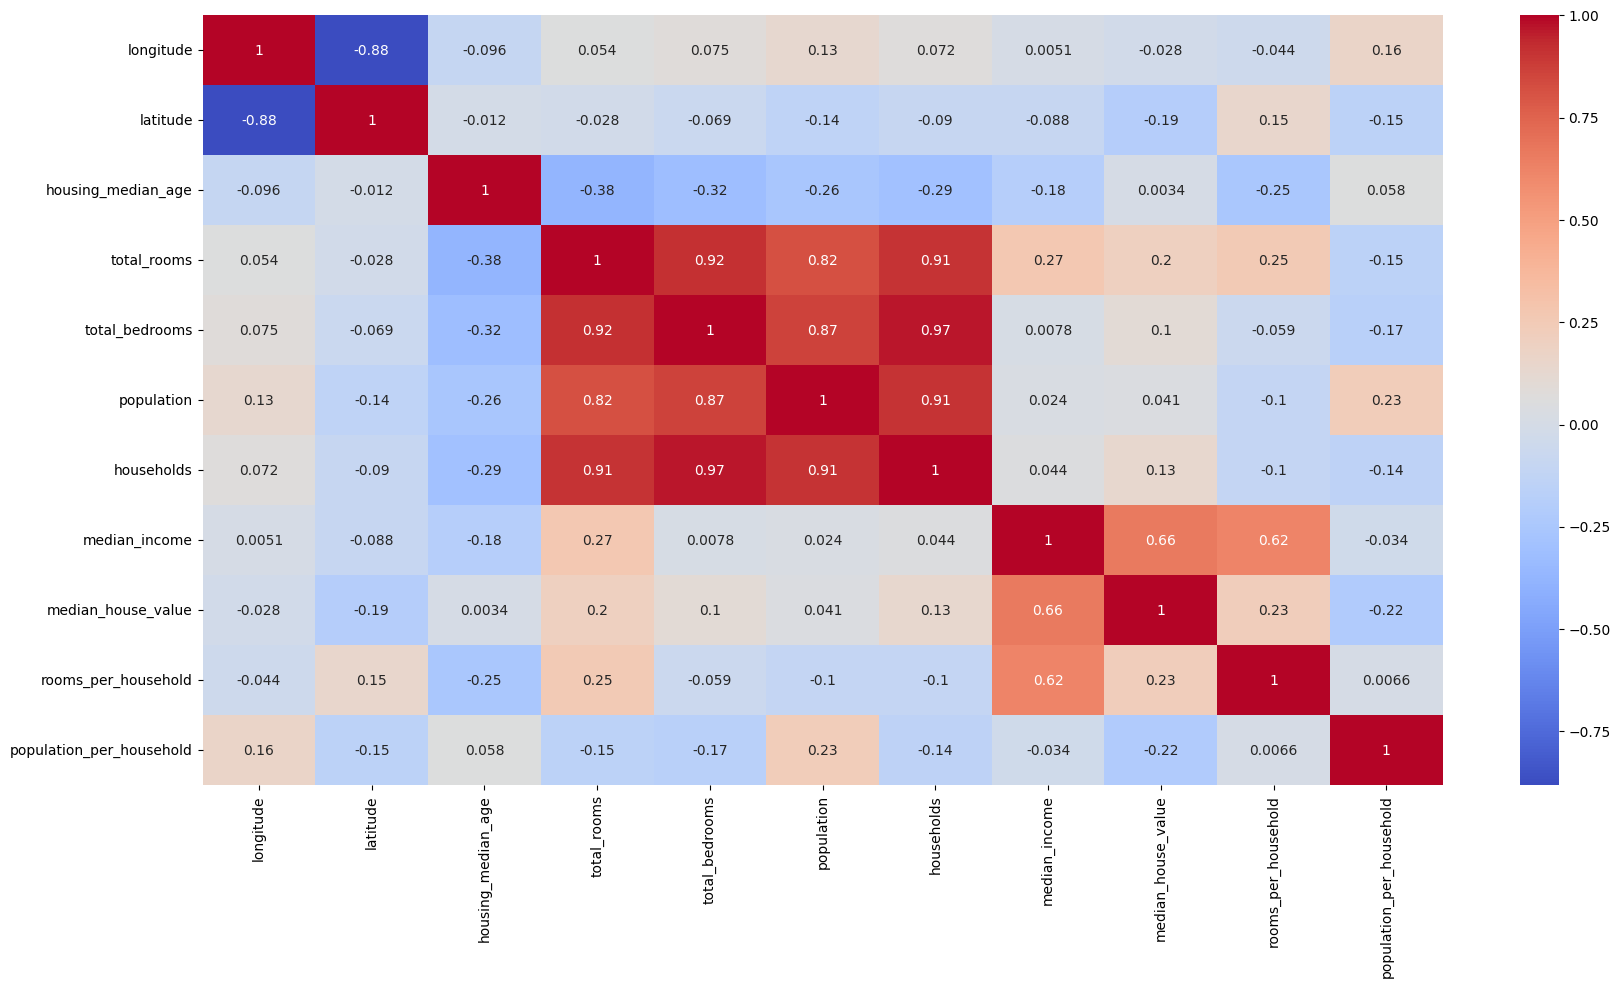

In [21]:
# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(df_california[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household',
       'population_per_household']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

> # Model

> save data

In [22]:
# df_california.to_csv('data_baru.csv')

In [23]:
# Memisahkan fitur dan target
feature = df_california.drop(['median_house_value'], axis=1)
target = df_california['median_house_value']


X = feature  
y = target   

>  Split dataset into training+validation and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 2020)

> ## Data Transformation

In [25]:
# X_test.to_csv('data_to_test.csv')

In [26]:
X_test.iloc[90]

longitude                     -122.3
latitude                        37.9
housing_median_age              30.0
total_rooms                   1772.0
total_bedrooms                 471.0
population                     880.0
households                     437.0
median_income                 2.2672
ocean_proximity             NEAR BAY
rooms_per_household          4.05492
population_per_household     2.01373
Name: 10744, dtype: object

In [27]:
# Memisahkan kolom numerik dan kategorikal
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Menentukan kolom yang akan di-scaling dan yang tidak
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('longitude')
numeric_features.remove('latitude')
exclude_scaling = ['longitude', 'latitude']
numeric_features_to_scale = [col for col in numeric_features if col not in exclude_scaling]
numeric_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household']

In [28]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer_longitude_latitude = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5))
])

In [29]:
# Fit OneHotEncoder on the combined data
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [30]:
# Pipeline untuk kolom numerik yang mencakup imputasi, transformasi log, dan scaling
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [31]:
# ColumnTransformer untuk menggabungkan semua pipeline
transformer = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('knn_imputer', imputer_longitude_latitude, exclude_scaling)
])


In [32]:
# Fit and transform the data
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [33]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.052632,-0.343876,-0.633636,-0.396304,-0.524096,0.968337,0.796607,0.622074,1.0,0.0,0.0,0.0,0.0,-118.68,34.27
1,-1.000000,0.269695,-0.030705,-0.046201,-0.069277,0.882676,0.949148,0.114924,0.0,1.0,0.0,0.0,0.0,-121.34,37.98
2,0.315789,-0.655549,-0.692254,-0.272074,-0.605422,0.297730,-0.306389,1.787317,1.0,0.0,0.0,0.0,0.0,-121.84,37.34
3,-1.157895,-0.344451,-0.195394,-0.170431,-0.132530,0.066378,-0.658384,-0.072754,0.0,1.0,0.0,0.0,0.0,-121.90,38.02
4,-1.052632,4.569293,5.699930,5.206366,5.057229,-0.498413,-0.252329,0.171824,0.0,1.0,0.0,0.0,0.0,-116.47,33.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,0.368421,-0.413456,-0.480112,-0.189938,-0.454819,-0.609414,0.141305,1.171746,0.0,1.0,0.0,0.0,0.0,-119.50,36.62
10396,-1.157895,1.125359,0.898814,0.524641,0.906627,-0.444391,0.338984,-0.541703,0.0,1.0,0.0,0.0,0.0,-116.87,33.76
10397,-0.736842,2.286371,1.183531,1.303901,1.078313,0.974394,1.748141,0.408403,0.0,1.0,0.0,0.0,0.0,-119.58,36.83
10398,0.421053,-0.700978,-0.675506,-0.578029,-0.605422,0.349621,-0.543277,0.150562,1.0,0.0,0.0,0.0,0.0,-118.32,33.91


In [34]:
transformer.transformers_

[('num',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('scaler', RobustScaler())]),
  ['housing_median_age',
   'total_rooms',
   'total_bedrooms',
   'population',
   'households',
   'median_income',
   'rooms_per_household',
   'population_per_household']),
 ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
 ('knn_imputer',
  Pipeline(steps=[('imputer', KNNImputer())]),
  ['longitude', 'latitude'])]

In [35]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income', 'rooms_per_household',
                                  'population_per_household']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('knn_imputer',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['longitude', 'latitude'])])

In [36]:
transformer.transformers_[0][1]

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler())])

In [37]:
transformer.transformers_[0][1].get_feature_names_out()

array(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'rooms_per_household',
       'population_per_household'], dtype=object)

In [38]:
transformer.transformers_[1][1]

OneHotEncoder(handle_unknown='ignore')

In [39]:
transformer.transformers_[1][1].get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [40]:
transformer.transformers_[2][1]

Pipeline(steps=[('imputer', KNNImputer())])

In [41]:
transformer.transformers_[2][1].get_feature_names_out()

array(['longitude', 'latitude'], dtype=object)

In [42]:
num_features = transformer.transformers_[0][1].get_feature_names_out()
cat_features = transformer.transformers_[1][1].get_feature_names_out()
knn_features = transformer.transformers_[2][1].get_feature_names_out()
# Convert the arrays to lists and concatenate them
features = list(num_features) + list(cat_features) + list(knn_features)

# Display the combined feature names
print(features)

['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'longitude', 'latitude']


In [43]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude
0,-0.052632,-0.343876,-0.633636,-0.396304,-0.524096,0.968337,0.796607,0.622074,1.0,0.0,0.0,0.0,0.0,-118.68,34.27
1,-1.000000,0.269695,-0.030705,-0.046201,-0.069277,0.882676,0.949148,0.114924,0.0,1.0,0.0,0.0,0.0,-121.34,37.98
2,0.315789,-0.655549,-0.692254,-0.272074,-0.605422,0.297730,-0.306389,1.787317,1.0,0.0,0.0,0.0,0.0,-121.84,37.34
3,-1.157895,-0.344451,-0.195394,-0.170431,-0.132530,0.066378,-0.658384,-0.072754,0.0,1.0,0.0,0.0,0.0,-121.90,38.02
4,-1.052632,4.569293,5.699930,5.206366,5.057229,-0.498413,-0.252329,0.171824,0.0,1.0,0.0,0.0,0.0,-116.47,33.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,0.368421,-0.413456,-0.480112,-0.189938,-0.454819,-0.609414,0.141305,1.171746,0.0,1.0,0.0,0.0,0.0,-119.50,36.62
10396,-1.157895,1.125359,0.898814,0.524641,0.906627,-0.444391,0.338984,-0.541703,0.0,1.0,0.0,0.0,0.0,-116.87,33.76
10397,-0.736842,2.286371,1.183531,1.303901,1.078313,0.974394,1.748141,0.408403,0.0,1.0,0.0,0.0,0.0,-119.58,36.83
10398,0.421053,-0.700978,-0.675506,-0.578029,-0.605422,0.349621,-0.543277,0.150562,1.0,0.0,0.0,0.0,0.0,-118.32,33.91


In [44]:
data = X_test_preprocessed + X_train_preprocessed

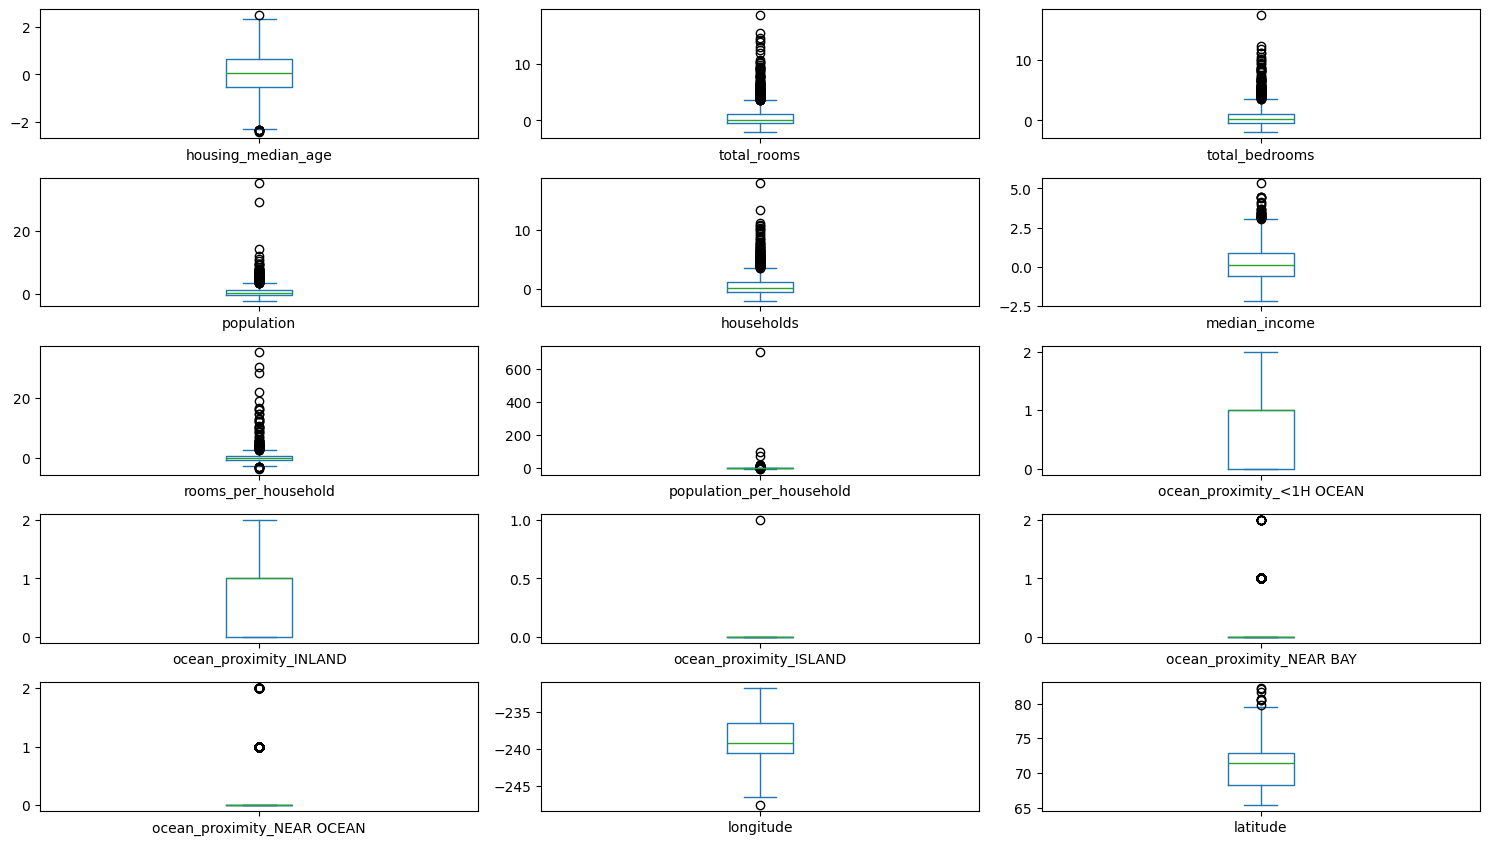

In [45]:
# Buat boxplot untuk setiap fitur
data.plot(kind='box', subplots=True, layout=(int(len(data.columns)/3)+1, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [46]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income', 'rooms_per_household',
                                  'population_per_household']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity']),
                                ('knn_imputer',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['longitude', 'latitude'])])

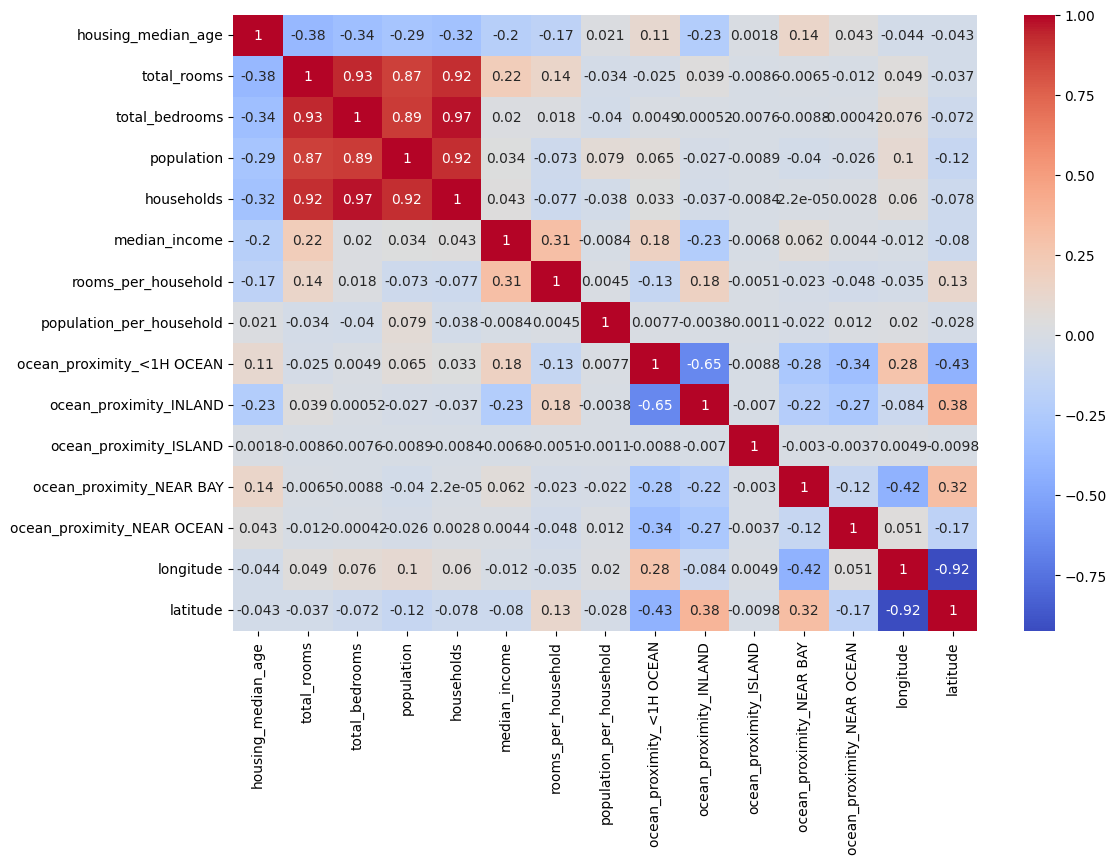

In [47]:
# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(X_train_preprocessed.corr(), annot=True, cmap='coolwarm')
plt.show()

> Model

In [48]:
import numpy as np
import pandas as pd
import psutil

# Model regresi
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import StratifiedKFold, cross_validate, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA

# Scorers
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, r2_score


In [49]:
# Definisikan transformasi log dan inverse-log
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp, check_inverse=True)

knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb_model = xgb.XGBRegressor(random_state=2020)
# baru
gbr = GradientBoostingRegressor(random_state=2020)
abr = AdaBoostRegressor(random_state=2020)

In [50]:

# Model dictionary
# Model dictionary with TransformedTargetRegressor
models = {
    "KNN": TransformedTargetRegressor(regressor=knn, transformer=log_transformer),
    "Decision Tree": TransformedTargetRegressor(regressor=tree, transformer=log_transformer),
    "Random Forest": TransformedTargetRegressor(regressor=rf, transformer=log_transformer),
    "XGBoost": TransformedTargetRegressor(regressor=xgb_model, transformer=log_transformer),
    "Gradient Boosting": TransformedTargetRegressor(regressor=gbr, transformer=log_transformer),
    "AdaBoost": TransformedTargetRegressor(regressor=abr, transformer=log_transformer)
}

# Create custom scorers for MAE and R2
scorers = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Initialize results lists
model_name = []
mae_mean_value = []
mae_std_value = []
mape_mean_value = []
mape_std_value = []
r2_mean_value = []
r2_std_value = []

# Train and evaluate each model
for name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=2020)
    
    estimator = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])
    
    # Evaluate model with cross-validation for MAE and R2
    cv_results = cross_validate(
        estimator,
        X_train,
        y_train,
        cv=kf,
        scoring=scorers,
        error_score='raise',
        return_train_score=False
    )
    
    # Store results
    model_name.append(name)
    mae_mean_value.append(cv_results['test_MAE'].mean())
    mae_std_value.append(cv_results['test_MAE'].std())
    
    mape_mean_value.append(cv_results['test_MAPE'].mean())
    mape_std_value.append(cv_results['test_MAPE'].std())
    
    r2_mean_value.append(cv_results['test_R2'].mean())
    r2_std_value.append(cv_results['test_R2'].std())
    
    print(f"{name} - MAE: {cv_results['test_MAE']}, MAPE: {cv_results['test_MAPE']} ,R2: {cv_results['test_R2']}")


KNN - MAE: [34918.43053443 34697.71362056 35685.96388574 34920.4207144
 35807.55543246], MAPE: [0.19060787 0.20181303 0.19722246 0.2066965  0.19077372] ,R2: [0.7131552  0.70237972 0.68218703 0.709182   0.70218056]
Decision Tree - MAE: [43679.32740385 40708.50961538 42625.19278846 43342.5
 44921.58653846], MAPE: [0.24807127 0.23733002 0.24296179 0.26119066 0.25126396] ,R2: [0.53715678 0.58811046 0.53547366 0.54718546 0.532271  ]
Random Forest - MAE: [30715.28702254 29904.91808798 31469.04458126 29339.2721663
 31140.01734762], MAPE: [0.16567492 0.17104792 0.17459838 0.1731809  0.16652202] ,R2: [0.76393246 0.7676386  0.73630137 0.78751945 0.76544721]
XGBoost - MAE: [28917.88736666 28713.78471116 29915.30173152 27938.53989258
 29478.11717999], MAPE: [0.16091139 0.16329052 0.16434195 0.1669878  0.15617417] ,R2: [0.79661479 0.78348117 0.75807108 0.80515755 0.78292142]
Gradient Boosting - MAE: [33885.11395729 32847.81937321 34250.03456326 32563.28691698
 33789.3540015 ], MAPE: [0.18393954 0.1

In [51]:
# Create benchmark_model_train DataFrame
benchmark_model = pd.DataFrame({
    'model': model_name,
    'mean_MAE': mae_mean_value,
    'std_MAE': mae_std_value,
    'mean_MAPE':mape_mean_value,
    'std_MAPE': mape_std_value,
    'mean_R2': r2_mean_value,
    'std_R2': r2_std_value
}).sort_values(by='mean_R2', ascending=False)

print(benchmark_model)

               model      mean_MAE      std_MAE  mean_MAPE  std_MAPE  \
3            XGBoost  28992.726176   675.495076   0.162341  0.003649   
2      Random Forest  30513.707841   786.827830   0.170205  0.003548   
4  Gradient Boosting  33467.121762   646.831728   0.187261  0.004426   
0                KNN  35206.016838   450.519930   0.197423  0.006261   
1      Decision Tree  43055.423269  1389.052679   0.248164  0.008047   
5           AdaBoost  48363.798150  1201.003386   0.273589  0.007376   

    mean_R2    std_R2  
3  0.785249  0.015954  
2  0.764168  0.016344  
4  0.734778  0.012992  
0  0.701817  0.010664  
1  0.548039  0.020647  
5  0.497120  0.018890  


In [52]:
train_bfr_tunning = benchmark_model.iloc[:3]
train_bfr_tunning

,model,mean_MAE,std_MAE,mean_MAPE,std_MAPE,mean_R2,std_R2
3,XGBoost,28992.726176,675.495076,0.162341,0.003649,0.785249,0.015954
2,Random Forest,30513.707841,786.827830,0.170205,0.003548,0.764168,0.016344
4,Gradient Boosting,33467.121762,646.831728,0.187261,0.004426,0.734778,0.012992


In [53]:
# Initialize results lists for test set evaluation
model_name = []
test_mape = []
test_r2 = []
test_mae = []

# Model dictionary with TransformedTargetRegressor
models = {
    "KNN": TransformedTargetRegressor(regressor=knn, transformer=log_transformer),
    "Decision Tree": TransformedTargetRegressor(regressor=tree, transformer=log_transformer),
    "Random Forest": TransformedTargetRegressor(regressor=rf, transformer=log_transformer),
    "XGBoost": TransformedTargetRegressor(regressor=xgb_model, transformer=log_transformer),
    "Gradient Boosting": TransformedTargetRegressor(regressor=gbr, transformer=log_transformer),
    "AdaBoost": TransformedTargetRegressor(regressor=abr, transformer=log_transformer)
}

# Evaluate each model on the test set
for name, model in models.items():
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    # Fit the model
    model_pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = model_pipeline.predict(X_test)
    
    # Evaluate
    mape = mean_absolute_percentage_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Store results
    test_mape.append(mape)
    test_r2.append(r2)
    test_mae.append(mae)
    model_name.append(name)

In [54]:
benchmark_model_test = pd.DataFrame({
    'Model': model_name,
    'MAE': test_mae,
    'Test MAPE': test_mape,
    'Test R2': test_r2
}).sort_values(by='Test R2', ascending=False)

print(benchmark_model_test)

               Model           MAE  Test MAPE   Test R2
3            XGBoost  28446.112405   0.156304  0.789591
2      Random Forest  29501.281434   0.159021  0.772985
4  Gradient Boosting  32804.220262   0.177748  0.740565
0                KNN  34950.244770   0.192492  0.701951
1      Decision Tree  41248.731538   0.232006  0.582476
5           AdaBoost  48969.731000   0.270849  0.481797


In [55]:
test_bfr_tunning = benchmark_model_test.iloc[:3]
print(test_bfr_tunning)

               Model           MAE  Test MAPE   Test R2
3            XGBoost  28446.112405   0.156304  0.789591
2      Random Forest  29501.281434   0.159021  0.772985
4  Gradient Boosting  32804.220262   0.177748  0.740565


>  ## Hyperparameter tuning Random Forest

In [56]:
# Definisikan transformasi log dan inverse-log
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp, check_inverse=True)

# Define custom scorers
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=2020)
rf = TransformedTargetRegressor(regressor=rf, transformer=log_transformer)

# Define parameter grid for Random Forest
param_grid_rf = {
    'model__regressor__n_estimators': [100, 200, 300],
    'model__regressor__max_depth': [None, 10, 20],
    'model__regressor__min_samples_split': [2, 5, 10],
    'model__regressor__min_samples_leaf': [1, 2, 4]
}

# Create pipeline
estimator_rf = Pipeline([
    ('transformer', transformer),
    ('model', rf)
])

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=estimator_rf,
    param_grid=param_grid_rf,
    cv=kf,
    scoring=scoring,
    refit='R2',
    n_jobs=-1,
    verbose=1
)

In [57]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income',
                                                                          'rooms_per_household'...
                         'model__regressor__min_samples_leaf': [1, 2, 4],
                         'model__regressor__min_samples_split': [2, 5, 10],
                         'model__regressor__n_estimators': [100, 200, 300]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [58]:
print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best cross-validation score for Random Forest: {grid_search_rf.best_score_}')

Best parameters for Random Forest: {'model__regressor__max_depth': None, 'model__regressor__min_samples_leaf': 1, 'model__regressor__min_samples_split': 2, 'model__regressor__n_estimators': 200}
Best cross-validation score for Random Forest: 0.765345556640393


>  ## Hyperparameter tuning XGBoost

In [59]:
# # Define custom scorers

# # Define the cross-validation strategy
# kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# # Definisikan metrik
# scoring = {
#     'MAE': make_scorer(mean_absolute_error),
#     'MAPE' : make_scorer(mean_absolute_percentage_error),
#     'R2': make_scorer(r2_score)
# }

# # Define the model
# xgb = XGBRegressor(random_state=2020)
# xgb = TransformedTargetRegressor(regressor=xgb, transformer=log_transformer)

# # Define the hyperparameter grid
# param_grid_xgb = {
#     'model__n_estimators': [100, 200, 300],
#     'model__learning_rate': [0.01, 0.1, 0.2],
#     'model__max_depth': [3, 5, 7],
#     'model__subsample': [0.8, 1.0],
#     'model__colsample_bytree': [0.8, 1.0],
#     'model__reg_alpha': [0, 0.1, 1],  
#     'model__reg_lambda': [1, 1.5, 2]  
# }

# # Create the pipeline
# estimator_xgb = Pipeline([
#     ('transformer', transformer),
#     ('model', xgb)
# ])

# # Konfigurasi GridSearchCV
# grid_search_xgb = GridSearchCV(
#     estimator=estimator_xgb,
#     param_grid=param_grid_xgb,
#     cv=kf,
#     scoring=scoring,
#     refit='R2',  
#     n_jobs=-1,
#     verbose=1
# )

In [60]:
# # Fit the model
# grid_search_xgb.fit(X_train, y_train)

In [61]:
# # Print the best parameters and the best cross-validation score
# print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
# print(f'Best cross-validation score for XGBoost: {grid_search_xgb.best_score_}')

Random Size

In [62]:
# Definisikan transformasi log dan inverse-log
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp, check_inverse=True)

# Define custom scorers
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Define the model without early stopping here
xgb_model = XGBRegressor(random_state=2020)
xgb_model = TransformedTargetRegressor(regressor=xgb_model, transformer=log_transformer)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid_xgb = {
    'model__regressor__n_estimators': [100, 200, 300, 400],
    'model__regressor__learning_rate': [0.01, 0.05, 0.1, 0.15],
    'model__regressor__max_depth': [3, 5, 7, 9],
    'model__regressor__subsample': [0.6, 0.8, 1.0],
    'model__regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'model__regressor__reg_alpha': [0, 0.05, 0.1, 0.5],  
    'model__regressor__reg_lambda': [0.5, 1, 1.5, 2],
    'model__regressor__min_child_weight': [1, 3, 5, 7],
    'model__regressor__gamma': [0, 0.1, 0.2, 0.3]
}

# Create the pipeline
estimator_xgb = Pipeline([
    ('transformer', transformer),
    ('model', xgb_model)
])

# Configure RandomizedSearchCV
randomized_search_xgb = RandomizedSearchCV(
    estimator=estimator_xgb,
    param_distributions=param_grid_xgb,
    n_iter=100,  # Set the number of iterations
    cv=kf,
    scoring=scoring,
    refit='R2',  
    n_jobs=-1,
    verbose=1,
    random_state=2020
)

In [63]:
# Fit the model
randomized_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income',
                                                                                'rooms_per_hous...
                                        'model__regressor__reg_alpha': [0, 0.05,
                                                                        0.1,
                                                                        0.5],
                                        'model__regressor__reg_lambda': [0.5, 1,
                                                                         1.5,
                                                                         2],
                                        'model__regressor__subsample': [0.6,
                                                                        0.8,
                                                                        1.0]},
                   random_state=2020, refit='R2',
                   scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                            'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                            'R2': make_scorer(r2_score, response_method='predict')},
                   verbose=1)

In [64]:
# Print the best parameters and the best cross-validation score
print("Best parameters for XGBoost:", randomized_search_xgb.best_params_)
print("Best cross-validation score for XGBoost:", randomized_search_xgb.best_score_)

Best parameters for XGBoost: {'model__regressor__subsample': 1.0, 'model__regressor__reg_lambda': 2, 'model__regressor__reg_alpha': 0.5, 'model__regressor__n_estimators': 400, 'model__regressor__min_child_weight': 7, 'model__regressor__max_depth': 7, 'model__regressor__learning_rate': 0.1, 'model__regressor__gamma': 0, 'model__regressor__colsample_bytree': 0.6}
Best cross-validation score for XGBoost: 0.8008140711925854


In [65]:
# # Generate learning curves
# train_sizes, train_scores, test_scores = learning_curve(
#     randomized_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1, 
#     train_sizes=np.linspace(0.1, 1.0, 10), random_state=2020)

# # Calculate mean and standard deviation for training and test scores
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Plot learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

# plt.title('Learning Curve')
# plt.xlabel('Training examples')
# plt.ylabel('R2 Score')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

>  ## Hyperparameter tuning Gradient Bossting

In [66]:
# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

# Definisikan metrik
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'MAPE': make_scorer(mean_absolute_percentage_error),
    'R2': make_scorer(r2_score)
}

# Define the model
gbr = GradientBoostingRegressor(random_state=2020)
gbr = TransformedTargetRegressor(regressor=gbr, transformer=log_transformer)

# Define the hyperparameter grid
param_grid_gbr = {
    'model__regressor__n_estimators': [100, 200, 300],
    'model__regressor__learning_rate': [0.01, 0.1, 0.2],
    'model__regressor__max_depth': [3, 5, 7],
    'model__regressor__subsample': [0.8, 1.0]
}

# Create the pipeline
estimator_gbr = Pipeline([
    ('transformer', transformer),
    ('model', gbr)
])

# Konfigurasi GridSearchCV
grid_search_gbr = GridSearchCV(
    estimator=estimator_gbr,
    param_grid=param_grid_gbr,
    cv=kf,
    scoring=scoring,
    refit='R2',  
    n_jobs=-1,
    verbose=1
)

In [67]:
# Fit the model
grid_search_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income',
                                                                          'rooms_per_household'...
                         'model__regressor__max_depth': [3, 5, 7],
                         'model__regressor__n_estimators': [100, 200, 300],
                         'model__regressor__subsample': [0.8, 1.0]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')},
             verbose=1)

In [68]:
# Print the best parameters and the best cross-validation score
print(f'Best parameters for XGBoost: {grid_search_gbr.best_params_}')
print(f'Best cross-validation score for XGBoost: {grid_search_gbr.best_score_}')

Best parameters for XGBoost: {'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 7, 'model__regressor__n_estimators': 300, 'model__regressor__subsample': 0.8}
Best cross-validation score for XGBoost: 0.7969487604720987


> ## After Tunning

In [69]:
best_xgb = randomized_search_xgb.best_estimator_
best_rf = grid_search_rf.best_estimator_

In [70]:
best_gbr = grid_search_gbr.best_estimator_

In [71]:

# Model dictionary
models = {
    "Random Forest After Tuning": best_rf,
    "XGBoost After Tuning": best_xgb,
    "Gradien Boosting" : best_gbr
}

# Initialize results lists
model_name = []
mae = []
mape = []
r2 = []

memory_usage_list = []

# Train and evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    model_name.append(name)
    mae_score = mean_absolute_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    r2_score_value = r2_score(y_test, y_pred)  # Rename the variable to avoid conflict
    mae.append(mae_score)
    mape.append(mape_score)
    r2.append(r2_score_value)

test_after_tuning = pd.DataFrame({
    'Model': model_name,
    'MAE': mae,
    'MAPE': mape,
    'R2': r2
})

print(test_after_tuning.sort_values(by='R2', ascending=False))


                        Model           MAE      MAPE        R2
1        XGBoost After Tuning  26662.975565  0.146036  0.812424
2            Gradien Boosting  27758.391355  0.150729  0.798828
0  Random Forest After Tuning  29406.739273  0.158588  0.774732


> # Model Peformance In Test

> ## After Tunning

In [72]:
display(test_bfr_tunning, test_after_tuning.sort_values(by='R2', ascending=False))

,Model,MAE,Test MAPE,Test R2
3,XGBoost,28446.112405,0.156304,0.789591
2,Random Forest,29501.281434,0.159021,0.772985
4,Gradient Boosting,32804.220262,0.177748,0.740565


,Model,MAE,MAPE,R2
1,XGBoost After Tuning,26662.975565,0.146036,0.812424
2,Gradien Boosting,27758.391355,0.150729,0.798828
0,Random Forest After Tuning,29406.739273,0.158588,0.774732


In [73]:
display(test_bfr_tunning, test_after_tuning.sort_values(by='R2', ascending=False))

,Model,MAE,Test MAPE,Test R2
3,XGBoost,28446.112405,0.156304,0.789591
2,Random Forest,29501.281434,0.159021,0.772985
4,Gradient Boosting,32804.220262,0.177748,0.740565


,Model,MAE,MAPE,R2
1,XGBoost After Tuning,26662.975565,0.146036,0.812424
2,Gradien Boosting,27758.391355,0.150729,0.798828
0,Random Forest After Tuning,29406.739273,0.158588,0.774732


> # Feature Importance

In [74]:
# Assign best estimator from randomized search
model_final = randomized_search_xgb.best_estimator_

# Predict
y_pred = model_final.predict(X_test)

In [75]:
# Get feature names after transformation
features = list(transformer.get_feature_names_out())

# Process feature names
list_features = ['_'.join(feature.split('_')[2:]) for feature in features]
print(list_features)


['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', '_longitude', '_latitude']


In [76]:
# Assign feature importance to variable
imp = model_final.named_steps['model'].regressor_.feature_importances_
print(imp)

[0.00665095 0.00602705 0.0037739  0.00456721 0.00381709 0.08531911
 0.01544266 0.0137627  0.06256961 0.61333644 0.         0.07632689
 0.06561536 0.02467558 0.01811559]


In [126]:
# to dataframe
features_imp = pd.DataFrame({
    'Importance': imp,
    "Feature": list_features
}).sort_values(by='Importance', ascending=False)
features_imp

,Importance,Feature
9,0.613336,ocean_proximity_INLAND
5,0.085319,median_income
11,0.076327,ocean_proximity_NEAR BAY
12,0.065615,ocean_proximity_NEAR OCEAN
8,0.062570,ocean_proximity_<1H OCEAN
13,0.024676,_longitude
14,0.018116,_latitude
6,0.015443,rooms_per_household
7,0.013763,population_per_household
0,0.006651,housing_median_age


<Axes: xlabel='Importance', ylabel='Feature'>

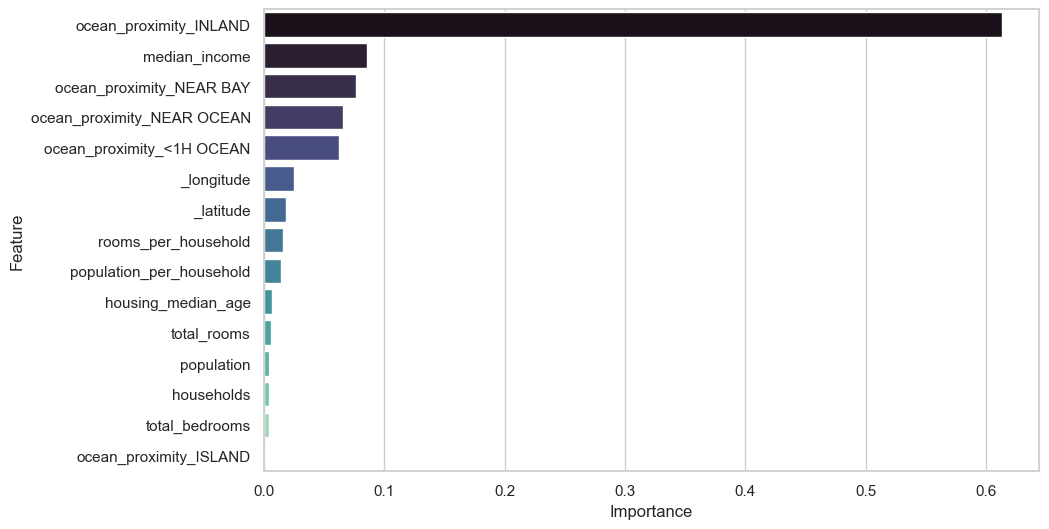

In [127]:
# visualization 
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=features_imp,x='Importance', y='Feature', orient='h', palette='mako')

# Explainable AI

In [79]:
import shap

In [80]:
model_final[1].predict

<bound method TransformedTargetRegressor.predict of TransformedTargetRegressor(regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=0.6,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None, gamma=0,
                                                  grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None

In [86]:
# explainer 
explainer = shap.Explainer(
    model_final[1].predict,
    model_final[0].transform(X_test)
)

shap_values = explainer( model_final[0].transform(X_test))

PermutationExplainer explainer: 2601it [04:29,  9.29it/s]                          


In [82]:
X_test.iloc[0] 

longitude                     -118.36
latitude                        34.05
housing_median_age               42.0
total_rooms                    1372.0
total_bedrooms                  435.0
population                      674.0
households                      271.0
median_income                  2.8793
ocean_proximity             <1H OCEAN
rooms_per_household          5.062731
population_per_household     2.487085
Name: 10743, dtype: object

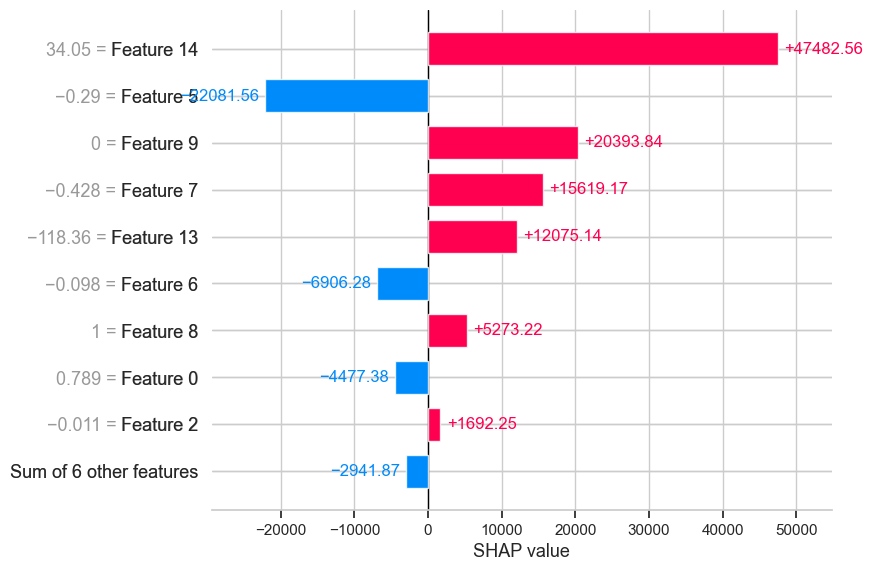

In [83]:
# shap_value for explain obvervation in test
shap.plots.bar(shap_values[0])

In [93]:
[i for i in enumerate(list_features)]

[(0, 'housing_median_age'),
 (1, 'total_rooms'),
 (2, 'total_bedrooms'),
 (3, 'population'),
 (4, 'households'),
 (5, 'median_income'),
 (6, 'rooms_per_household'),
 (7, 'population_per_household'),
 (8, 'ocean_proximity_<1H OCEAN'),
 (9, 'ocean_proximity_INLAND'),
 (10, 'ocean_proximity_ISLAND'),
 (11, 'ocean_proximity_NEAR BAY'),
 (12, 'ocean_proximity_NEAR OCEAN'),
 (13, '_longitude'),
 (14, '_latitude')]

In [95]:
# Transform the training data
X_train_trans = model_final.named_steps['transformer'].transform(X_train)

# Get the actual model from TransformedTargetRegressor
actual_model = model_final.named_steps['model'].regressor_

# Create the SHAP explainer
explainer = shap.TreeExplainer(
    actual_model,
    data=X_train_trans,
    feature_perturbation='interventional',
    model_output='raw'
)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train_trans)

100%|===================| 10354/10400 [04:08<00:01]        

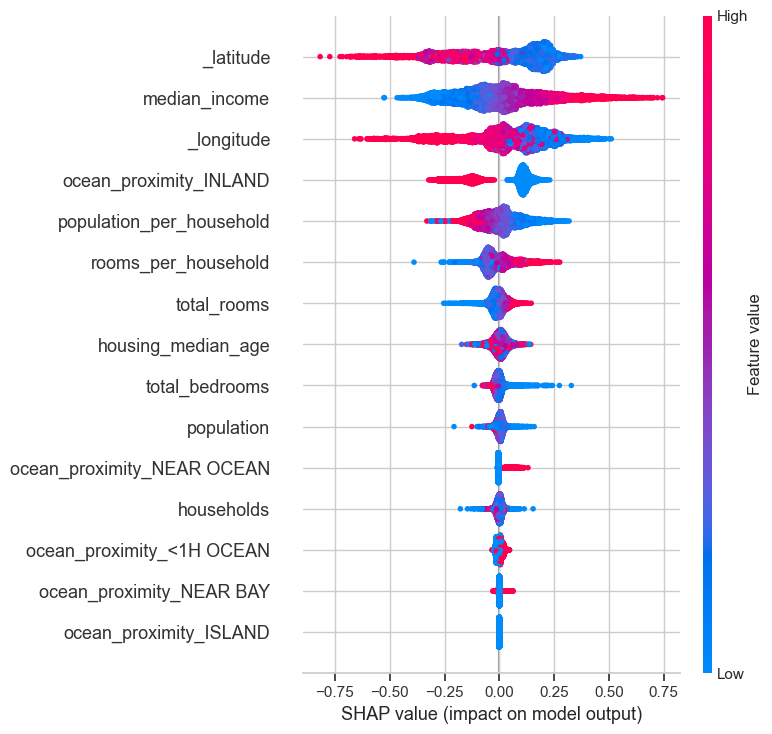

In [96]:
# summary plot for in train 
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names=list_features  # perbaiki argumen di sini
)


In [97]:
# LIME
import lime
from lime import lime_tabular

In [98]:
# explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data = model_final[0].transform(X_train),
    feature_names = list_features,
    class_names = ['Not Buy', 'Buy'],
    mode = 'classification'
)
explainer


## Conclusion

### Algorithm
Berdasarkan evaluasi hasil algoritma untuk pemodelan, dapat diambil kesimpulan bahwa **XGBoost Regressor** adalah algoritma terbaik. XGBoost menunjukkan performa paling unggul dengan MAE terendah sebesar 28446.112405 sebelum tuning dan 26662.975565 setelah tuning. Random Forest Regressor juga menunjukkan performa yang baik, namun masih di bawah XGBoost. Gradient Boosting juga menunjukkan peningkatan setelah tuning, namun tetap di bawah XGBoost.

### Evaluation Metrics
Setelah dilakukan tuning, XGBoost terbukti sebagai algoritma dengan metrik terbaik. Terjadi penurunan MAE dari 28446.112405 menjadi 26662.975565, dan peningkatan R2 dari 0.789591 menjadi 0.812424. Penurunan MAPE dari 0.156304 menjadi 0.146036 juga menunjukkan peningkatan akurasi prediksi. Meskipun peningkatan tidak terlalu signifikan, namun konsisten di semua metrik evaluasi.

### Feature Importance
Berdasarkan hasil feature importance, dapat disimpulkan bahwa lokasi memiliki pengaruh yang sangat signifikan terhadap harga rumah di California. Fitur 'ocean_proximity_INLAND' memiliki importance tertinggi (0.613336), diikuti oleh 'median_income' (0.085319) dan fitur lokasi lainnya seperti 'ocean_proximity_NEAR BAY' (0.076327) dan 'ocean_proximity_NEAR OCEAN' (0.065615). Ini menunjukkan bahwa jarak dari pantai dan tingkat pendapatan median area sangat mempengaruhi harga rumah.

### Kesimpulan
Dengan hasil ini, model yang dikembangkan dapat membantu perusahaan real estate di California dalam:
- Menentukan harga properti dengan lebih akurat
- Mengurangi risiko pricing yang tidak tepat
- Meningkatkan efisiensi operasional serta profitabilitas perusahaan.


# Recomendation

### Feature Engineering Tambahan:
Buat fitur tambahan berdasarkan analisis domain, seperti:
- Jarak ke fasilitas umum (sekolah, rumah sakit, pusat perbelanjaan)
- Tingkat kriminalitas di lingkungan sekitar
- Rating sekolah

Data eksternal ini dapat memberikan informasi tambahan yang berguna.

### Pemilihan Algoritma Lain:
Coba eksplorasi lebih banyak algoritma machine learning seperti:
- **LightGBM**
- **CatBoost**

Algoritma ini seringkali dapat menawarkan kinerja yang lebih baik atau pelatihan yang lebih cepat dibandingkan dengan XGBoost dan Random Forest.

### Pemutakhiran Data:
- **Penggunaan Data Terbaru**: Data yang digunakan berasal dari sensus tahun 1990. Sangat direkomendasikan untuk memperbarui data dengan data sensus terbaru atau data real estate terkini. Kondisi pasar properti, demografi, dan faktor ekonomi telah banyak berubah sejak 1990, sehingga menggunakan data terbaru akan menghasilkan model yang lebih relevan dan akurat.


<body>

<h1>Analisis Pengaruh Lokasi Geografis terhadap Harga Properti</h1>
<p>Untuk pengembang properti atau agen real estate, penting untuk memperhatikan lokasi geografis dalam menentukan harga jual properti. Properti di dekat pesisir pantai biasanya memiliki nilai lebih tinggi, sementara properti di pedalaman cenderung memiliki harga yang lebih rendah. Faktor-faktor seperti pendapatan median di daerah dan aksesibilitas juga perlu dipertimbangkan dalam menetapkan harga jual properti.</p>
<p>Berdasarkan feature importance dan arah pengaruh dari fitur dapat disimpulkan:</p>

<h2>Arah Pengaruh Fitur terhadap Target</h2>
<p>Berdasarkan SHAP values yang dihasilkan untuk interpretasi, kita dapat melihat pengaruh positif atau negatif dari setiap fitur terhadap harga rumah. Berikut adalah interpretasi pengaruhnya:</p>

<ul>
    <li>
        <strong>latitude (_latitude):</strong>
        <span class="positive">Pengaruh Positif:</span> Nilai SHAP positif menunjukkan bahwa kenaikan nilai latitude (ke utara) memiliki pengaruh positif yang besar terhadap harga rumah, sekitar $50,427.77.
    </li>
    <li>
        <strong>longitude (_longitude):</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai longitude (ke barat) memiliki pengaruh negatif yang cukup besar terhadap harga rumah, sekitar -$8,806.87.
    </li>
    <li>
        <strong>median_income:</strong>
        <span class="positive">Pengaruh Positif:</span> Kenaikan nilai median_income memiliki pengaruh positif signifikan terhadap harga rumah, sekitar $22,868.54.
    </li>
    <li>
        <strong>population_per_household:</strong>
        <span class="positive">Pengaruh Positif:</span> Nilai SHAP positif menunjukkan bahwa kenaikan nilai population_per_household memiliki pengaruh positif terhadap harga rumah, sekitar $14,894.97.
    </li>
    <li>
        <strong>rooms_per_household:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai rooms_per_household memiliki pengaruh negatif terhadap harga rumah, sekitar -$8,806.87.
    </li>
    <li>
        <strong>housing_median_age:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai housing_median_age memiliki pengaruh negatif terhadap harga rumah, sekitar -$3,523.32.
    </li>
    <li>
        <strong>total_bedrooms:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai total_bedrooms memiliki pengaruh negatif terhadap harga rumah, sekitar -$4,224.22.
    </li>
    <li>
        <strong>total_rooms:</strong>
        <span class="negative">Pengaruh Negatif:</span> Nilai SHAP negatif menunjukkan bahwa kenaikan nilai total_rooms memiliki pengaruh negatif terhadap harga rumah, sekitar -$1,441.65.
    </li>
    <li>
        <strong>ocean_proximity_<1H OCEAN:</strong>
        <span class="positive">Pengaruh Positif:</span> Kenaikan nilai fitur ini memiliki pengaruh positif terhadap harga rumah, sekitar $3,165.71.
    </li>
</ul>

</body>

In [1]:
# import pickle

# # Simpan model ke file
# pickle.dump(model_final, open('Final_Model_Capstone.pkl', 'wb'))